[ Ìï≠Í≥µ ÏßÄÏó∞ ÏÇ¨Ïú†ÏôÄ Í∏∞ÏÉÅÏÉÅÌô©Ïùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù ]
- Analysis of the Relationship Between Flight Delays and Weather Conditions

- Flight Delay & Weather Analysis

- ÍπÄÌè¨ Í≥µÌï≠ 2024ÎÖÑ 01Ïõî 01Ïùº ~ 2024ÎÖÑ 12Ïõî 31Ïùº Ï∞©Î•ô Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [35]:
# Î™®Îìà Ïã§Ìñâ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
#%pip install seaborn

In [37]:
## Trial 1 ÏóêÏÑú GIMPO_ARRIVAL_24.csv ÏôÄ GIMPO_WEATHER_HOUR_24.csv ÌååÏùº ÏÉùÏÑ±
## ÌååÏùº ÏúÑÏπò : C:\Users\KDP-27\Desktop\KDT7\TEAM_Project\03_VISUAL_project\DATA\ÏõîÎ≥Ñ Î≥ëÌï© ÌõÑ ÏûêÎ£å

# csv ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
CSV_ARRIVAL='../DATA/ÏõîÎ≥Ñ Î≥ëÌï© ÌõÑ ÏûêÎ£å/GIMPO_ARRIVAL_24.csv'
CSV_WEATHER='../DATA/ÏõîÎ≥Ñ Î≥ëÌï© ÌõÑ ÏûêÎ£å/GIMPO_WEATHER_HOUR_24.csv'

# csv ÌååÏùº pandasÎ°ú ÏùΩÍ∏∞
ARRIVAL_BASIC=pd.read_csv(CSV_ARRIVAL)
WEATHER_BASIC=pd.read_csv(CSV_WEATHER)

In [38]:
ARRIVAL_BASIC.head(1)

Ï∂ú/ÎèÑÏ∞©Íµ¨Î∂Ñ        ÎÇ†Ïßú    Ìï≠Í≥µÏÇ¨      Ìé∏Î™Ö Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú Ï∂úÎ∞úÍ≥µÌï≠Î™Ö ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú ÎèÑÏ∞©Í≥µÌï≠Î™Ö   Í≥ÑÌöçÏãúÍ∞Ñ   ÏòàÏÉÅÏãúÍ∞Ñ  \
0     ÎèÑÏ∞©  20240101  Ïù¥Ïä§ÌÉÄÌï≠Í≥µ  ZE262F    ICN    Ïù∏Ï≤ú    GMP    ÍπÄÌè¨  07:15  06:50   

    ÎèÑÏ∞©ÏãúÍ∞Ñ  Íµ¨Î∂Ñ  ÌòÑÌô©  
0  07:34  Í∏∞ÌÉÄ  ÏßÄÏó∞

In [39]:
WEATHER_BASIC.head(1)

ÏßÄÏ†ê   ÏßÄÏ†êÎ™Ö                ÏùºÏãú  ÌíçÌñ•(deg)  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  \
0  110  ÍπÄÌè¨Í≥µÌï≠  2024-01-01 00:00      330       2   2500         1    -2.2   

   Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Ìï¥Î©¥Í∏∞Ïïï(hPa)  ÌòÑÏßÄÍ∏∞Ïïï(hPa)  Í∞ïÏàòÎüâ(mm)  
0       -2.2     1027.1     1024.8      NaN

In [40]:
# ARRIVAL_BASIC   ÏùºÏãú 2024-01-01 00:00  Ìñâ Î∂ÑÎ¶¨ ÌõÑ Ïó¥ Ï∂îÍ∞Ä
#                 => ÎÇ†Ïßú 2024-01-01
#                 => ÏãúÍ∞Ñ 00:00
WEATHER_BASIC[['ÎÇ†Ïßú','ÏãúÍ∞Ñ']]=WEATHER_BASIC['ÏùºÏãú'].str.split(' ',expand=True)

In [41]:
# WEATHER_BASICÏùò 'Í∞ïÏàòÎüâ(mm)' NaN Í∞íÏùÑ 0.ÏúºÎ°ú Î≥ÄÍ≤Ω
WEATHER_BASIC['Í∞ïÏàòÎüâ(mm)'] = WEATHER_BASIC['Í∞ïÏàòÎüâ(mm)'].fillna(0.)

In [42]:
# ARRIVAL_BASIC ÎÇ†Ïßú ÌòïÏãù : 20240101 => 2024-01-01
ARRIVAL_BASIC['ÎÇ†Ïßú'] = pd.to_datetime(ARRIVAL_BASIC['ÎÇ†Ïßú'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [43]:
ARRIVAL_BASIC.head(1)

Ï∂ú/ÎèÑÏ∞©Íµ¨Î∂Ñ          ÎÇ†Ïßú    Ìï≠Í≥µÏÇ¨      Ìé∏Î™Ö Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú Ï∂úÎ∞úÍ≥µÌï≠Î™Ö ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú ÎèÑÏ∞©Í≥µÌï≠Î™Ö   Í≥ÑÌöçÏãúÍ∞Ñ   ÏòàÏÉÅÏãúÍ∞Ñ  \
0     ÎèÑÏ∞©  2024-01-01  Ïù¥Ïä§ÌÉÄÌï≠Í≥µ  ZE262F    ICN    Ïù∏Ï≤ú    GMP    ÍπÄÌè¨  07:15  06:50   

    ÎèÑÏ∞©ÏãúÍ∞Ñ  Íµ¨Î∂Ñ  ÌòÑÌô©  
0  07:34  Í∏∞ÌÉÄ  ÏßÄÏó∞

In [44]:
WEATHER_BASIC.head(1)

ÏßÄÏ†ê   ÏßÄÏ†êÎ™Ö                ÏùºÏãú  ÌíçÌñ•(deg)  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  \
0  110  ÍπÄÌè¨Í≥µÌï≠  2024-01-01 00:00      330       2   2500         1    -2.2   

   Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Ìï¥Î©¥Í∏∞Ïïï(hPa)  ÌòÑÏßÄÍ∏∞Ïïï(hPa)  Í∞ïÏàòÎüâ(mm)          ÎÇ†Ïßú     ÏãúÍ∞Ñ  
0       -2.2     1027.1     1024.8      0.0  2024-01-01  00:00

In [45]:
## Îëê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©ÏùÑ ÏúÑÌïú ÏûëÏóÖ
# ARRIVAL_BASIC 'ÎèÑÏ∞©ÏãúÍ∞Ñ' Ïó¥Ïùò Ïãú(hour) Î∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú ÌõÑ Ïó¥ Ï∂îÍ∞Ä (Ïòà: "07:34" ‚Üí "07") 
ARRIVAL_BASIC['ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú'] = ARRIVAL_BASIC['ÎèÑÏ∞©ÏãúÍ∞Ñ'].str[:2]

# WEATHER_BASIC 'ÎÇ†Ïßú' Ïó¥Ïùò Ïãú(hour) Î∂ÄÎ∂ÑÎßå Ï∂îÏ∂ú ÌõÑ Ïó¥ Ï∂îÍ∞Ä
WEATHER_BASIC['ÏãúÍ∞Ñ_Ïãú'] = WEATHER_BASIC['ÏãúÍ∞Ñ'].str[:2]

In [46]:
ARRIVAL_BASIC.head(1)

Ï∂ú/ÎèÑÏ∞©Íµ¨Î∂Ñ          ÎÇ†Ïßú    Ìï≠Í≥µÏÇ¨      Ìé∏Î™Ö Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú Ï∂úÎ∞úÍ≥µÌï≠Î™Ö ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú ÎèÑÏ∞©Í≥µÌï≠Î™Ö   Í≥ÑÌöçÏãúÍ∞Ñ   ÏòàÏÉÅÏãúÍ∞Ñ  \
0     ÎèÑÏ∞©  2024-01-01  Ïù¥Ïä§ÌÉÄÌï≠Í≥µ  ZE262F    ICN    Ïù∏Ï≤ú    GMP    ÍπÄÌè¨  07:15  06:50   

    ÎèÑÏ∞©ÏãúÍ∞Ñ  Íµ¨Î∂Ñ  ÌòÑÌô© ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú  
0  07:34  Í∏∞ÌÉÄ  ÏßÄÏó∞     07

In [47]:
WEATHER_BASIC.head(1)

ÏßÄÏ†ê   ÏßÄÏ†êÎ™Ö                ÏùºÏãú  ÌíçÌñ•(deg)  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  \
0  110  ÍπÄÌè¨Í≥µÌï≠  2024-01-01 00:00      330       2   2500         1    -2.2   

   Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Ìï¥Î©¥Í∏∞Ïïï(hPa)  ÌòÑÏßÄÍ∏∞Ïïï(hPa)  Í∞ïÏàòÎüâ(mm)          ÎÇ†Ïßú     ÏãúÍ∞Ñ ÏãúÍ∞Ñ_Ïãú  
0       -2.2     1027.1     1024.8      0.0  2024-01-01  00:00   00

In [48]:
## Îëê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
GIMPO = pd.merge(WEATHER_BASIC, ARRIVAL_BASIC,
        how='inner',
        left_on=['ÎÇ†Ïßú', 'ÏãúÍ∞Ñ_Ïãú'],
        right_on=['ÎÇ†Ïßú', 'ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú'])

# Î≥ëÌï©Í≤∞Í≥ºÎ•º csv ÌååÏùºÎ°ú Ï†ÄÏû• (ÌïúÍ∏Ä Ïù∏ÏΩîÎî©)
GIMPO.to_csv('ARRIVAL_and_WEATHER.csv', index=False, encoding='utf-8-sig')

In [49]:
# Î≥ëÌï©Í≤∞Í≥º ÌôïÏù∏
GIMPO.head(1)

ÏßÄÏ†ê   ÏßÄÏ†êÎ™Ö                ÏùºÏãú  ÌíçÌñ•(deg)  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  \
0  110  ÍπÄÌè¨Í≥µÌï≠  2024-01-01 07:00      280       2    700         6    -2.4   

   Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Ìï¥Î©¥Í∏∞Ïïï(hPa)  ...  Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú  Ï∂úÎ∞úÍ≥µÌï≠Î™Ö ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú ÎèÑÏ∞©Í≥µÌï≠Î™Ö   Í≥ÑÌöçÏãúÍ∞Ñ   ÏòàÏÉÅÏãúÍ∞Ñ   ÎèÑÏ∞©ÏãúÍ∞Ñ  \
0       -2.4     1029.4  ...     ICN     Ïù∏Ï≤ú    GMP    ÍπÄÌè¨  07:15  06:50  07:34   

   Íµ¨Î∂Ñ  ÌòÑÌô© ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú  
0  Í∏∞ÌÉÄ  ÏßÄÏó∞     07  

[1 rows x 28 columns]

In [50]:
GIMPO.columns

Index(['ÏßÄÏ†ê', 'ÏßÄÏ†êÎ™Ö', 'ÏùºÏãú', 'ÌíçÌñ•(deg)', 'ÌíçÏÜç(KT)', 'ÏãúÏ†ï(m)', 'Ï†ÑÏö¥Îüâ(1/8)', 'Í∏∞Ïò®(¬∞C)',
       'Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', 'Ìï¥Î©¥Í∏∞Ïïï(hPa)', 'ÌòÑÏßÄÍ∏∞Ïïï(hPa)', 'Í∞ïÏàòÎüâ(mm)', 'ÎÇ†Ïßú', 'ÏãúÍ∞Ñ', 'ÏãúÍ∞Ñ_Ïãú',
       'Ï∂ú/ÎèÑÏ∞©Íµ¨Î∂Ñ', 'Ìï≠Í≥µÏÇ¨', 'Ìé∏Î™Ö', 'Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú', 'Ï∂úÎ∞úÍ≥µÌï≠Î™Ö', 'ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú', 'ÎèÑÏ∞©Í≥µÌï≠Î™Ö', 'Í≥ÑÌöçÏãúÍ∞Ñ',
       'ÏòàÏÉÅÏãúÍ∞Ñ', 'ÎèÑÏ∞©ÏãúÍ∞Ñ', 'Íµ¨Î∂Ñ', 'ÌòÑÌô©', 'ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú'],
      dtype='object')

In [51]:
GIMPO.drop(columns=['ÏßÄÏ†ê','ÏßÄÏ†êÎ™Ö','ÌíçÌñ•(deg)','Ìï¥Î©¥Í∏∞Ïïï(hPa)','ÌòÑÏßÄÍ∏∞Ïïï(hPa)','ÎÇ†Ïßú', 
                    'ÏãúÍ∞Ñ', 'ÏãúÍ∞Ñ_Ïãú','Ï∂ú/ÎèÑÏ∞©Íµ¨Î∂Ñ', 'Ìï≠Í≥µÏÇ¨', 'Ìé∏Î™Ö', 'Ï∂úÎ∞úÍ≥µÌï≠ÏΩîÎìú', 
                    'Ï∂úÎ∞úÍ≥µÌï≠Î™Ö', 'ÎèÑÏ∞©Í≥µÌï≠ÏΩîÎìú', 'ÎèÑÏ∞©Í≥µÌï≠Î™Ö', 'ÏòàÏÉÅÏãúÍ∞Ñ','ÎèÑÏ∞©ÏãúÍ∞Ñ_Ïãú'],inplace=True)

In [120]:
GIMPO

ÏùºÏãú  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Í∞ïÏàòÎüâ(mm)  \
0      2024-01-01 07:00       2    700         6    -2.4       -2.4      0.0   
1      2024-01-01 08:00       1    700         5    -2.6       -2.8      0.0   
2      2024-01-01 08:00       1    700         5    -2.6       -2.8      0.0   
3      2024-01-01 08:00       1    700         5    -2.6       -2.8      0.0   
4      2024-01-01 08:00       1    700         5    -2.6       -2.8      0.0   
...                 ...     ...    ...       ...     ...        ...      ...   
64183  2024-12-31 22:00       1  10000         0    -5.0       -7.9      0.0   
64184  2024-12-31 22:00       1  10000         0    -5.0       -7.9      0.0   
64185  2024-12-31 22:00       1  10000         0    -5.0       -7.9      0.0   
64186  2024-12-31 22:00       1  10000         0    -5.0       -7.9      0.0   
64187  2024-12-31 22:00       1  10000         0    -5.0       -7.9      0.0   

        Í≥ÑÌöçÏãúÍ∞Ñ   ÎèÑÏ∞©ÏãúÍ∞Ñ  Íµ¨Î∂Ñ  ÌòÑÌô©  diff  delay_flag  
0      07:15  07:34  Í∏∞ÌÉÄ  ÏßÄÏó∞   0.0           1  
1      08:10  08:56  Ïó¨Í∞ù  ÏßÄÏó∞   0.2           1  
2      08:15  08:44  Ïó¨Í∞ù  ÏßÄÏó∞   0.2           1  
3      08:15  08:10  Ïó¨Í∞ù  ÎèÑÏ∞©   0.2           0  
4      08:25  08:22  Ïó¨Í∞ù  ÎèÑÏ∞©   0.2           0  
...      ...    ...  ..  ..   ...         ...  
64183  22:30  22:27  Ïó¨Í∞ù  ÎèÑÏ∞©   2.9           0  
64184  22:30  22:22  Ïó¨Í∞ù  ÎèÑÏ∞©   2.9           0  
64185  22:35  22:40  Ïó¨Í∞ù  ÎèÑÏ∞©   2.9           0  
64186  22:35  22:30  Ïó¨Í∞ù  ÎèÑÏ∞©   2.9           0  
64187  22:40  22:33  Ïó¨Í∞ù  ÎèÑÏ∞©   2.9           0  

[64188 rows x 13 columns]

In [52]:
# Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) (Dew Point Temperature):

# ÏùòÎØ∏: Í≥µÍ∏∞Í∞Ä Ìè¨Ìôî ÏÉÅÌÉúÍ∞Ä ÎêòÏñ¥ ÏàòÏ¶ùÍ∏∞Í∞Ä Î¨ºÎ∞©Ïö∏(Ïù¥Ïä¨)Î°ú ÏùëÍ≤∞ÎêòÍ∏∞ ÏãúÏûëÌïòÎäî Ïò®ÎèÑÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

# ÏÑ§Î™Ö: Ïù¥Ïä¨Ï†êÏò®ÎèÑÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Í≥µÍ∏∞ Ï§ëÏóê ÏàòÏ¶ùÍ∏∞Í∞Ä ÎßéÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏñ¥ ÏäµÎèÑÍ∞Ä ÎÜíÏùÄ ÏÉÅÌÉúÎ•º ÏùòÎØ∏Ìï©ÎãàÎã§. 
# Î∞òÎåÄÎ°ú Ïù¥Ïä¨Ï†êÏò®ÎèÑÍ∞Ä ÎÇÆÏúºÎ©¥ Í≥µÍ∏∞Í∞Ä Í±¥Ï°∞Ìïú ÏÉÅÌÉúÏûÑÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

# Ïù¥ Îëê Í∞íÏùÄ Í∏∞ÏÉÅ ÏÉÅÌô©ÏùÑ ÌååÏïÖÌïòÎäî Îç∞ Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïòÎ©∞, ÌäπÌûà Í∏∞Ïò®Í≥º Ïù¥Ïä¨Ï†êÏò®ÎèÑÏùò Ï∞®Ïù¥Í∞Ä ÏûëÏúºÎ©¥ ÎåÄÍ∏∞Í∞Ä Ìè¨Ìôî ÏÉÅÌÉúÏóê Í∞ÄÍπåÏõåÏ†∏ 
# ÏïàÍ∞ú, Ïù¥Ïä¨, ÎòêÎäî Í∞ïÏàò Î∞úÏÉù Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏïÑÏßëÎãàÎã§.

In [53]:
# Í≥ÑÌöçÏãúÍ∞Ñ (Scheduled Time):

# Ìï≠Í≥µÏÇ¨Í∞Ä ÏõêÎûò Ï†ïÌïú Í≥µÏãùÏ†ÅÏù∏ Ï∂úÎ∞ú ÎòêÎäî ÎèÑÏ∞© ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
# ÏòàÎ•º Îì§Ïñ¥, Ìï≠Í≥µÍ∂å ÏòàÏïΩ Ïãú ÏïàÎÇ¥ÎêòÎäî ÏãúÍ∞ÑÏù¥ Ïù¥ ÏãúÍ∞ÑÏûÖÎãàÎã§.

# ÏòàÏÉÅÏãúÍ∞Ñ (Estimated Time):

# Ïã§ÏãúÍ∞Ñ Ïö¥Ìï≠ ÏÉÅÌô©(Ïòà: Í∏∞ÏÉÅ, Ìï≠Í≥µ ÍµêÌÜµ ÏÉÅÌô© Îì±)Ïóê Îî∞Îùº ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎäî ÏãúÍ∞ÑÏûÖÎãàÎã§.
# Ìï≠Í≥µÏÇ¨Í∞Ä ÌòÑÏû¨ ÏÉÅÌô©ÏùÑ Î∞òÏòÅÌïòÏó¨ Î≥ÄÍ≤ΩÎêú ÏòàÏÉÅ ÎèÑÏ∞© ÎòêÎäî Ï∂úÎ∞ú ÏãúÍ∞ÑÏùÑ ÏïàÎÇ¥Ìï† Îïå ÏÇ¨Ïö©Ìï©ÎãàÎã§.

# ÎèÑÏ∞©ÏãúÍ∞Ñ (Actual Arrival Time):

# Ìï≠Í≥µÍ∏∞Í∞Ä Ïã§Ï†úÎ°ú ÎèÑÏ∞©Ìïú ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
# Î™®Îì† Ïö¥Ìï≠Ïù¥ ÏôÑÎ£åÎêú ÌõÑ Í∏∞Î°ùÎêòÎäî ÏµúÏ¢Ö ÎèÑÏ∞© ÏãúÍ∞ÑÏûÖÎãàÎã§.


# Ìï≠Í≥µÍ∏∞ ÏßÄÏó∞ Î∂ÑÏÑù Ïãú ÎπÑÍµêÌï† ÏãúÍ∞Ñ
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ìï≠Í≥µÍ∏∞ ÏßÄÏó∞ÏùÑ Î∂ÑÏÑùÌï† ÎïåÎäî **Í≥ÑÌöçÏãúÍ∞Ñ (Scheduled Time)**Í≥º **ÎèÑÏ∞©ÏãúÍ∞Ñ (Actual Arrival Time)**ÏùÑ ÎπÑÍµêÌï©ÎãàÎã§.

# ÏßÄÏó∞ ÏãúÍ∞Ñ = Ïã§Ï†ú ÎèÑÏ∞©ÏãúÍ∞Ñ - Í≥ÑÌöç ÎèÑÏ∞©ÏãúÍ∞Ñ
# Ïù¥ Î∞©ÏãùÏù¥ Í∞ÄÏû• ÌëúÏ§ÄÏ†ÅÏù∏ ÏßÄÏó∞ Î∂ÑÏÑù Î∞©Î≤ïÏûÖÎãàÎã§.
# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú,

# **ÏòàÏÉÅÏãúÍ∞Ñ (Estimated Time)**ÏùÄ Ïö¥Ìï≠ Ï§ëÏóê ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎäî Í∞íÏù¥ÎØÄÎ°ú, ÏßÄÏó∞ Ï∂îÏù¥Î•º Ïã§ÏãúÍ∞ÑÏúºÎ°ú ÌååÏïÖÌïòÍ±∞ÎÇò ÏòàÏ∏° Î™®Îç∏ÏùÑ ÎßåÎì§ Îïå Ï∞∏Í≥†Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# Í∑∏Îü¨ÎÇò ÏµúÏ¢ÖÏ†ÅÏù∏ ÏßÄÏó∞ Ïó¨Î∂ÄÎ•º ÌèâÍ∞ÄÌïòÎ†§Î©¥ Ïã§Ï†ú ÎèÑÏ∞©ÏãúÍ∞ÑÍ≥º Í≥ÑÌöçÏãúÍ∞ÑÏùò Ï∞®Ïù¥Í∞Ä Í∏∞Ï§ÄÏù¥ Îê©ÎãàÎã§.
# Îî∞ÎùºÏÑú Ìï≠Í≥µÍ∏∞ ÏßÄÏó∞ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ÏÑúÎäî Í≥ÑÌöçÏãúÍ∞ÑÍ≥º ÎèÑÏ∞©ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§.

In [65]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows: ÎßëÏùÄ Í≥†Îîï)
plt.rc('font', family='Malgun Gothic')

# Í∑∏ÎûòÌîÑÏóêÏÑú ÎßàÏù¥ÎÑàÏä§(-) Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

In [66]:
# ÌòÑÌô© Ïó¥Ïùò Í∞í Ï≤¥ÌÅ¨ (NaN Í∞íÎèÑ ÌëúÏãúÎêòÍ≤å)
COUNT=GIMPO['ÌòÑÌô©'].value_counts(dropna=False)
print(COUNT)

ÌòÑÌô©
ÎèÑÏ∞©    48830
ÏßÄÏó∞    15356
ÌöåÌï≠        2
Name: count, dtype: int64


In [67]:
GIMPO.describe()
# mean ÌèâÍ∑†, std ÌëúÏ§ÄÌé∏Ï∞®

ÌíçÏÜç(KT)         ÏãúÏ†ï(m)      Ï†ÑÏö¥Îüâ(1/8)        Í∏∞Ïò®(¬∞C)     Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  \
count  64188.000000  64188.000000  64188.000000  64188.000000  64188.000000   
mean       6.024755   9309.286783      3.686982     15.734119      8.880258   
std        3.313454   1701.809392      3.045162     10.926910     11.791961   
min        0.000000    200.000000      0.000000    -13.600000    -21.000000   
25%        3.000000  10000.000000      0.000000      5.600000     -1.100000   
50%        6.000000  10000.000000      4.000000     16.900000      9.600000   
75%        8.000000  10000.000000      7.000000     25.300000     18.600000   
max       20.000000  10000.000000      8.000000     36.400000     28.700000   

            Í∞ïÏàòÎüâ(mm)  
count  64188.000000  
mean       0.139271  
std        1.315191  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       51.800000

In [68]:
GIMPO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64188 entries, 0 to 64187
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ÏùºÏãú         64188 non-null  object 
 1   ÌíçÏÜç(KT)     64188 non-null  int64  
 2   ÏãúÏ†ï(m)      64188 non-null  int64  
 3   Ï†ÑÏö¥Îüâ(1/8)   64188 non-null  int64  
 4   Í∏∞Ïò®(¬∞C)     64188 non-null  float64
 5   Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  64188 non-null  float64
 6   Í∞ïÏàòÎüâ(mm)    64188 non-null  float64
 7   Í≥ÑÌöçÏãúÍ∞Ñ       64188 non-null  object 
 8   ÎèÑÏ∞©ÏãúÍ∞Ñ       64188 non-null  object 
 9   Íµ¨Î∂Ñ         64188 non-null  object 
 10  ÌòÑÌô©         64188 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 5.4+ MB


In [69]:
GIMPO.head(2)

ÏùºÏãú  ÌíçÏÜç(KT)  ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)  Í∏∞Ïò®(¬∞C)  Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)  Í∞ïÏàòÎüâ(mm)  \
0  2024-01-01 07:00       2    700         6    -2.4       -2.4      0.0   
1  2024-01-01 08:00       1    700         5    -2.6       -2.8      0.0   

    Í≥ÑÌöçÏãúÍ∞Ñ   ÎèÑÏ∞©ÏãúÍ∞Ñ  Íµ¨Î∂Ñ  ÌòÑÌô©  
0  07:15  07:34  Í∏∞ÌÉÄ  ÏßÄÏó∞  
1  08:10  08:56  Ïó¨Í∞ù  ÏßÄÏó∞

In [70]:
# ÌíçÏÜç(KT)Ïóê Îî∞Î•∏ ÌòÑÌô© Ïó¥ Ï∂îÏ∂ú
# ÌíçÏÜç Îã®ÏúÑ : KT, Knot, ÎÖ∏Ìä∏
# 1ÎÖ∏Ìä∏Îäî 1ÏãúÍ∞Ñ ÎèôÏïà 1Ìï¥Î¶¨(ÏïΩ 1.852km) Ïù¥ÎèôÌïòÎäî ÏÜçÎèÑÎ•º ÎÇòÌÉÄÎÉÑ

WIND_KNOT = GIMPO.groupby('ÌíçÏÜç(KT)')['ÌòÑÌô©'].value_counts().unstack(fill_value=0)
print(WIND_KNOT)

ÌòÑÌô©        ÎèÑÏ∞©    ÏßÄÏó∞  ÌöåÌï≠
ÌíçÏÜç(KT)                
0         87    32   0
1       2051   495   0
2       5050  1117   0
3       6314  1741   1
4       5623  1589   0
5       5931  1812   0
6       5165  1671   0
7       4648  1513   0
8       3940  1485   0
9       2963  1045   0
10      2416   919   0
11      1584   666   0
12      1139   509   0
13       784   292   0
14       475   164   0
15       216   134   1
16       225    76   0
17       127    41   0
18        52    36   0
19        15     5   0
20        25    14   0


In [71]:
# ÌíçÏÜç(KT)Ïóê Îî∞Î•∏ ÌòÑÌô© Ïó¥Ïùò 'ÎèÑÏ∞©'Í≥º 'ÏßÄÏó∞'Îßå Ï∂îÏ∂ú 
WIND = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÏßÄÏó∞', 'ÎèÑÏ∞©'])] .groupby('ÌíçÏÜç(KT)')['ÌòÑÌô©']\
                          .value_counts() .unstack(fill_value=0)
WIND

ÌòÑÌô©        ÎèÑÏ∞©    ÏßÄÏó∞
ÌíçÏÜç(KT)            
0         87    32
1       2051   495
2       5050  1117
3       6314  1741
4       5623  1589
5       5931  1812
6       5165  1671
7       4648  1513
8       3940  1485
9       2963  1045
10      2416   919
11      1584   666
12      1139   509
13       784   292
14       475   164
15       216   134
16       225    76
17       127    41
18        52    36
19        15     5
20        25    14

In [123]:
# WIND Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_WIND = [(0,5), (6, 10), (11, 15), (16, 20)]
LABELS_WIND = ['0~5', '6~10', '11~15', '16~20']

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def WIND_bin(x):
    for (low, high), label in zip(BINS_WIND, LABELS_WIND):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
WIND_grouped = WIND.groupby(WIND.index.map(WIND_bin)).sum()
WIND_grouped = WIND_grouped.reindex(LABELS_WIND)
print(WIND_grouped)

WIND_percent = WIND_grouped.div(WIND_grouped.sum(axis=1), axis=0) * 100
WIND_percent = WIND_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
WIND_percent

ÌòÑÌô©         ÎèÑÏ∞©    ÏßÄÏó∞
ÌíçÏÜç(KT)             
0~5     25056  6786
6~10    19132  6633
11~15    4198  1765
16~20     444   172


ÌòÑÌô©             ÏßÄÏó∞
ÌíçÏÜç(KT)           
0~5     21.311475
6~10    25.744227
11~15   29.599195
16~20   27.922078

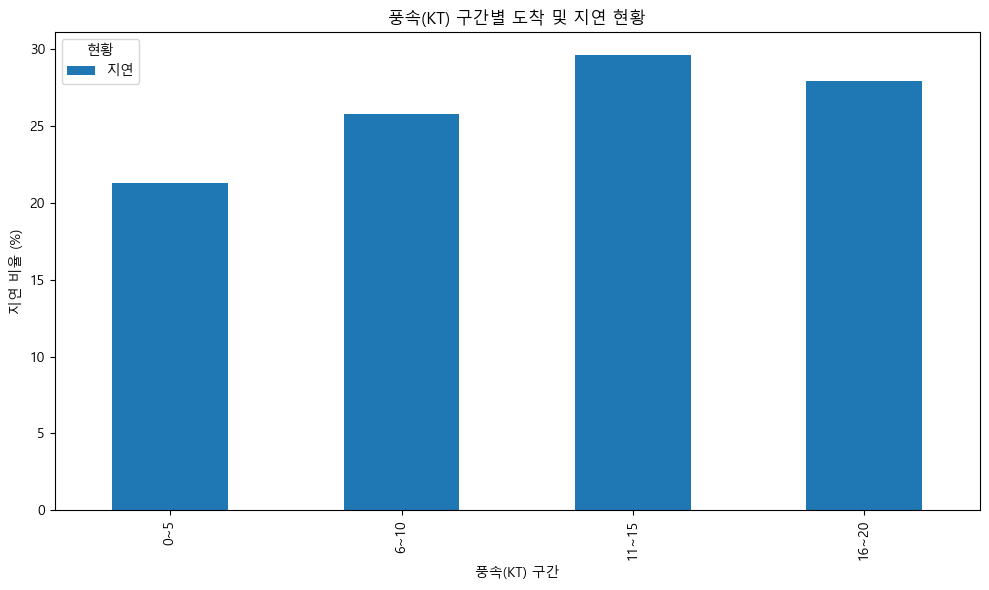

In [104]:
# WIND Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
WIND_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('ÌíçÏÜç(KT) Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('ÌíçÏÜç(KT) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

In [124]:
import matplotlib.cm as cm

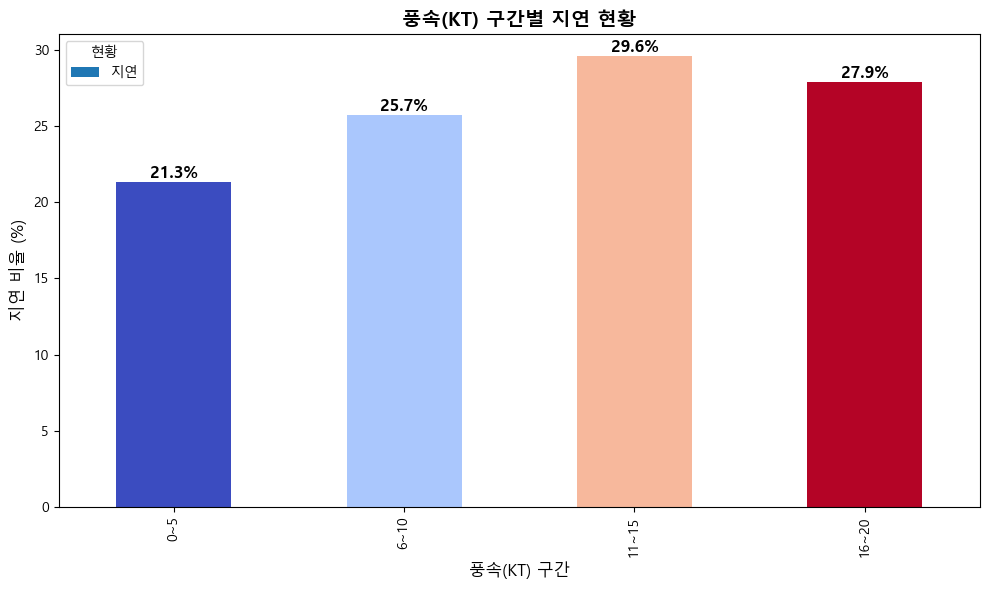

In [127]:
# Í∞Å ÎßâÎåÄ(ÌíçÏÜç Íµ¨Í∞Ñ) ÏàòÏóê ÎßûÍ≤å coolwarm Ïª¨Îü¨ÎßµÏóêÏÑú ÏÉâÏÉÅ Ï∂îÏ∂ú
n = len(WIND_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrameÏùò plot()ÏúºÎ°ú Í∏∞Î≥∏ ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
ax = WIND_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Í∞Å ÎßâÎåÄÎ•º ÏàúÏÑúÎåÄÎ°ú ÏàúÌöåÌïòÎ©¥ÏÑú ÏÉâÏÉÅ Î≥ÄÍ≤Ω
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ï∂ï Î†àÏù¥Î∏î Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('ÌíçÏÜç(KT) Íµ¨Í∞Ñ', fontsize=12)
ax.set_ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)
ax.set_title('ÌíçÏÜç(KT) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÌòÑÌô©', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [74]:
CLOUD = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÏßÄÏó∞', 'ÎèÑÏ∞©'])] \
             .groupby('Ï†ÑÏö¥Îüâ(1/8)')['ÌòÑÌô©'] \
             .value_counts() \
             .unstack(fill_value=0)
print(CLOUD)

ÌòÑÌô©           ÎèÑÏ∞©    ÏßÄÏó∞
Ï†ÑÏö¥Îüâ(1/8)             
0         14378  3409
1          4062  1058
2          3134   827
3          3534  1048
4          3298  1053
5          3383  1108
6          4456  1372
7          7202  2296
8          5383  3185


In [75]:
# CLOUD Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_CLOUD = [(0,2), (3, 4), (5, 6), (7, 8)]
LABELS_CLOUD = ['0~2', '3~4', '5~6', '7~8']

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def CLOUD_bin(x):
    for (low, high), label in zip(BINS_CLOUD, LABELS_CLOUD):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
CLOUD_grouped = CLOUD.groupby(CLOUD.index.map(CLOUD_bin)).sum()
CLOUD_grouped = CLOUD_grouped.reindex(LABELS_CLOUD)
print(CLOUD_grouped)

CLOUD_percent = CLOUD_grouped.div(CLOUD_grouped.sum(axis=1), axis=0) * 100
CLOUD_percent = CLOUD_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
print(CLOUD_percent)

ÌòÑÌô©           ÎèÑÏ∞©    ÏßÄÏó∞
Ï†ÑÏö¥Îüâ(1/8)             
0~2       21574  5294
3~4        6832  2101
5~6        7839  2480
7~8       12585  5481
ÌòÑÌô©               ÏßÄÏó∞
Ï†ÑÏö¥Îüâ(1/8)           
0~2       19.703737
3~4       23.519534
5~6       24.033337
7~8       30.338758


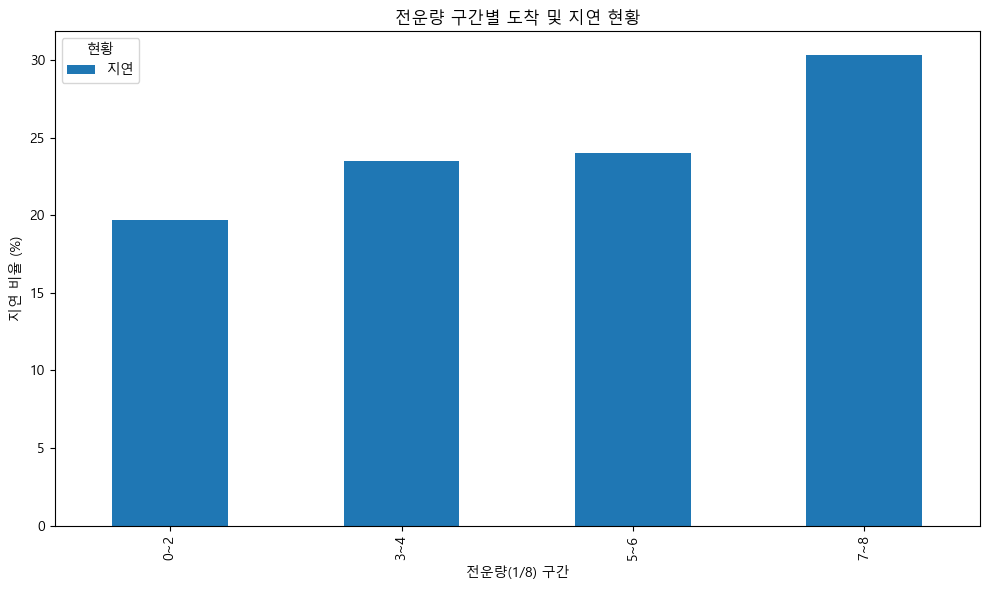

In [76]:
# CLOUD Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
CLOUD_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ï†ÑÏö¥Îüâ(1/8) Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('Ï†ÑÏö¥Îüâ Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

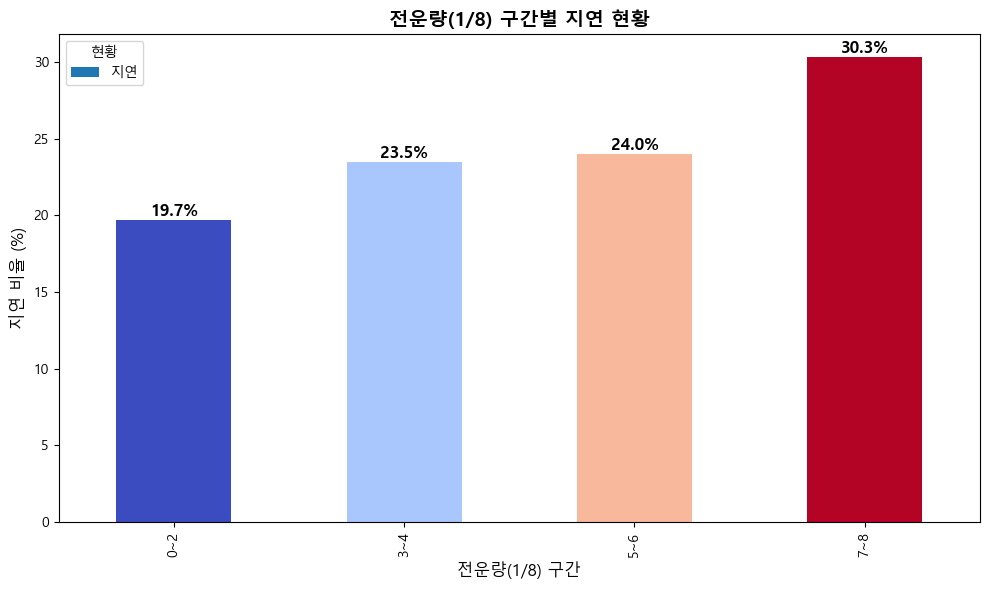

In [129]:
# Í∞Å ÎßâÎåÄ(Ï†ÑÏö¥Îüâ Íµ¨Í∞Ñ) ÏàòÏóê ÎßûÍ≤å coolwarm Ïª¨Îü¨ÎßµÏóêÏÑú ÏÉâÏÉÅ Ï∂îÏ∂ú
n = len(CLOUD_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrameÏùò plot()ÏúºÎ°ú Í∏∞Î≥∏ ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
ax = CLOUD_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Í∞Å ÎßâÎåÄÎ•º ÏàúÏÑúÎåÄÎ°ú ÏàúÌöåÌïòÎ©¥ÏÑú ÏÉâÏÉÅ Î≥ÄÍ≤Ω
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ï∂ï Î†àÏù¥Î∏î Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('Ï†ÑÏö¥Îüâ(1/8) Íµ¨Í∞Ñ', fontsize=12)
ax.set_ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)
ax.set_title('Ï†ÑÏö¥Îüâ(1/8) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÌòÑÌô©', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [77]:
SIGHT = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÏßÄÏó∞', 'ÎèÑÏ∞©'])] \
             .groupby('ÏãúÏ†ï(m)')['ÌòÑÌô©'] \
             .value_counts() \
             .unstack(fill_value=0)
SIGHT

ÌòÑÌô©        ÎèÑÏ∞©     ÏßÄÏó∞
ÏãúÏ†ï(m)              
200        5      3
300        3      5
400       14      4
500        1      0
600       12      8
700       17     10
800       31     22
900        9      0
1000      15     18
1200      24     13
1400       1      1
1500      79     41
1600      13      5
1800      14      8
2000      98     54
2200      26      7
2500     248     82
3000     191     82
3200      12      9
3500     410    162
4000     391    160
4500     186     58
5000     969    288
6000    1346    443
7000    1576    544
8000    1840    550
9000    1567    474
10000  39732  12305

In [135]:
# SIGHT Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_SIGHT = [(200, 1000), (1200, 2000), (2200, 5000), (6000, 10000)]
LABELS_SIGHT = ['200~1000', '1200~2000', '2200~5000', '6000~10000']

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def SIGHT_bin(x):
    for (low, high), label in zip(BINS_SIGHT, LABELS_SIGHT):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
SIGHT_grouped = SIGHT.groupby(SIGHT.index.map(SIGHT_bin)).sum()
SIGHT_grouped = SIGHT_grouped.reindex(LABELS_SIGHT)
print(SIGHT_grouped)

SIGHT_percent = SIGHT_grouped.div(SIGHT_grouped.sum(axis=1), axis=0) * 100
SIGHT_percent = SIGHT_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
print(SIGHT_percent)

ÌòÑÌô©             ÎèÑÏ∞©     ÏßÄÏó∞
ÏãúÏ†ï(m)                   
200~1000      107     70
1200~2000     229    122
2200~5000    2433    848
6000~10000  46061  14316
ÌòÑÌô©                 ÏßÄÏó∞
ÏãúÏ†ï(m)                
200~1000    39.548023
1200~2000   34.757835
2200~5000   25.845779
6000~10000  23.711016


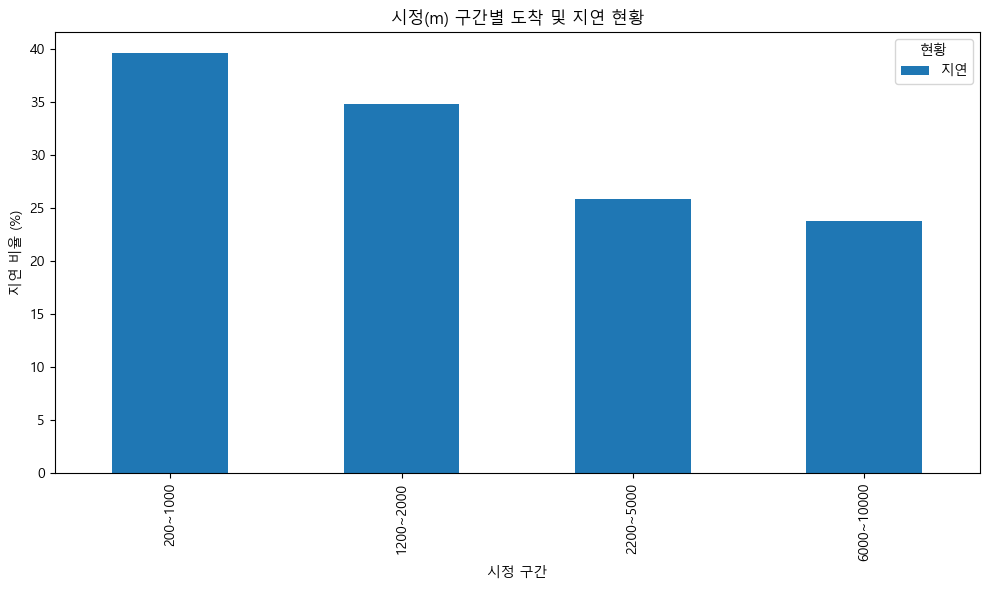

In [ ]:
# SIGHT Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
SIGHT_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('ÏãúÏ†ï Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('ÏãúÏ†ï(m) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

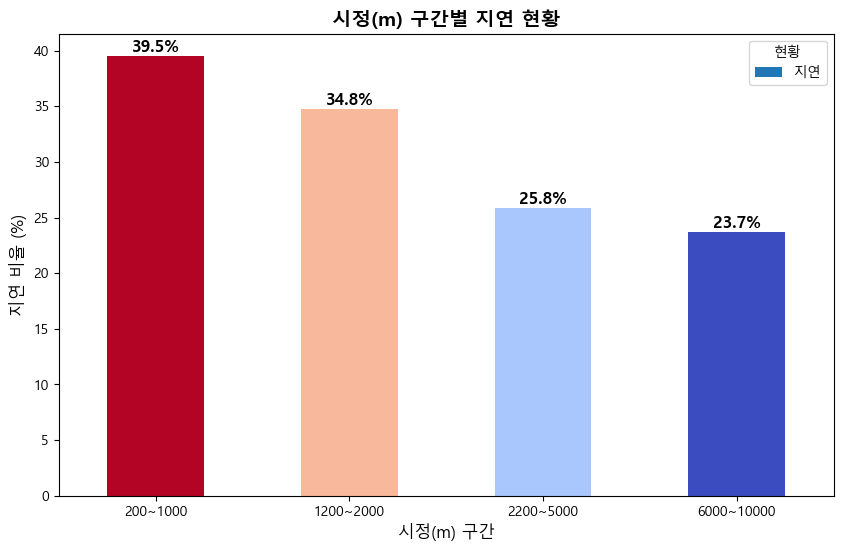

In [ ]:
# ÎßâÎåÄ Í∞úÏàòÏóê ÎßûÍ≤å ÏÉâÏÉÅ Ï∂îÏ∂ú (coolwarm_r: coolwarmÏùò Ïó≠Ïàú, Ï¶â Î∂âÏùÄÏÉâÏóêÏÑú Ìë∏Î•∏ÏÉâ)
n = len(SIGHT_percent.index)
colors = cm.coolwarm_r(np.linspace(0, 1, n))

# DataFrameÏùò plot()ÏúºÎ°ú Í∏∞Î≥∏ ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
ax = SIGHT_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Í∞Å ÎßâÎåÄÎ•º ÏàúÌöåÌïòÎ©¥ÏÑú ÏÉâÏÉÅ Î≥ÄÍ≤Ω Î∞è ÏßÄÏó∞ ÎπÑÏú® ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ï∂ï Î†àÏù¥Î∏î Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('ÏãúÏ†ï(m) Íµ¨Í∞Ñ', fontsize=12)
ax.set_ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)
ax.set_title('ÏãúÏ†ï(m) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÌòÑÌô©', fontsize=14, fontweight='bold')

# xÏ∂ï Î†àÏù¥Î∏îÏùÑ Í∞ÄÎ°úÎ°ú ÌëúÏãú
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [81]:
# Í∞ïÏàòÎüâ(mm)
RAIN = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÏßÄÏó∞', 'ÎèÑÏ∞©'])] \
             .groupby('Í∞ïÏàòÎüâ(mm)')['ÌòÑÌô©'] \
             .value_counts() \
             .unstack(fill_value=0)
RAIN

ÌòÑÌô©          ÎèÑÏ∞©     ÏßÄÏó∞
Í∞ïÏàòÎüâ(mm)              
0.0      46406  13798
0.1        317    158
0.2        212    163
0.3        294    140
0.4        123     53
...        ...    ...
21.9         8      3
25.0         5      4
26.5         2      7
27.5         8      5
51.8        12      2

[76 rows x 2 columns]

In [82]:
# RAIN Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_RAIN = [(0, 1), (1.1, 5), (5.1, 10), (10.1, 51.8)]
LABELS_RAIN = ['0~1', '1.1~5', '5.1~10', '10.1~51.8']

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def RAIN_bin(x):
    for (low, high), label in zip(BINS_RAIN, LABELS_RAIN):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
RAIN_grouped = RAIN.groupby(RAIN.index.map(RAIN_bin)).sum()
RAIN_grouped = RAIN_grouped.reindex(LABELS_RAIN)
print(RAIN_grouped)

RAIN_percent = RAIN_grouped.div(RAIN_grouped.sum(axis=1), axis=0) * 100
RAIN_percent = RAIN_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
print(RAIN_percent)

ÌòÑÌô©            ÎèÑÏ∞©     ÏßÄÏó∞
Í∞ïÏàòÎüâ(mm)                
0~1        47909  14643
1.1~5        704    525
5.1~10       110    108
10.1~51.8    107     80
ÌòÑÌô©                ÏßÄÏó∞
Í∞ïÏàòÎüâ(mm)             
0~1        23.409323
1.1~5      42.717657
5.1~10     49.541284
10.1~51.8  42.780749


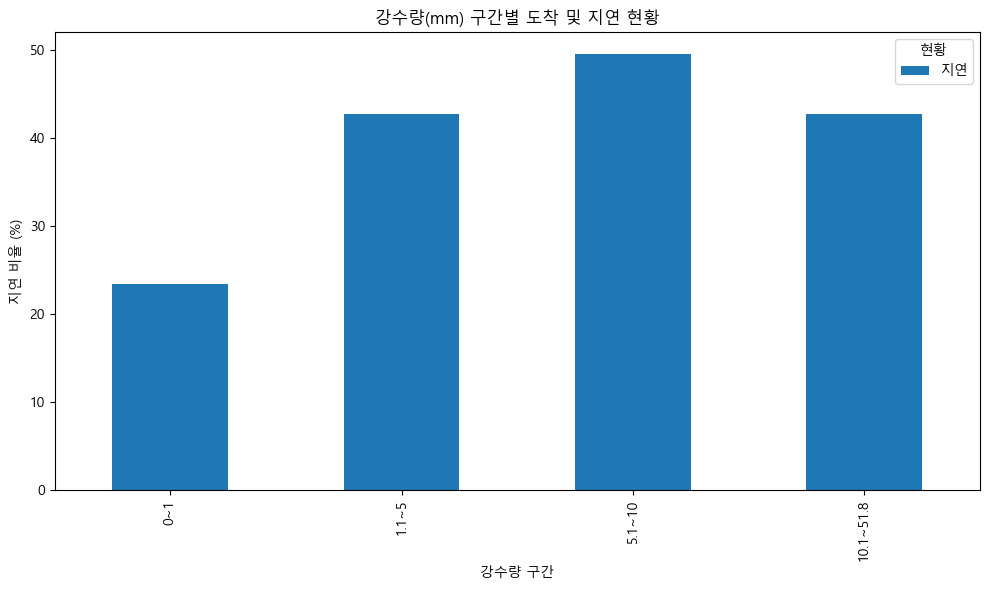

In [83]:
# RAIN Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
RAIN_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Í∞ïÏàòÎüâ Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('Í∞ïÏàòÎüâ(mm) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

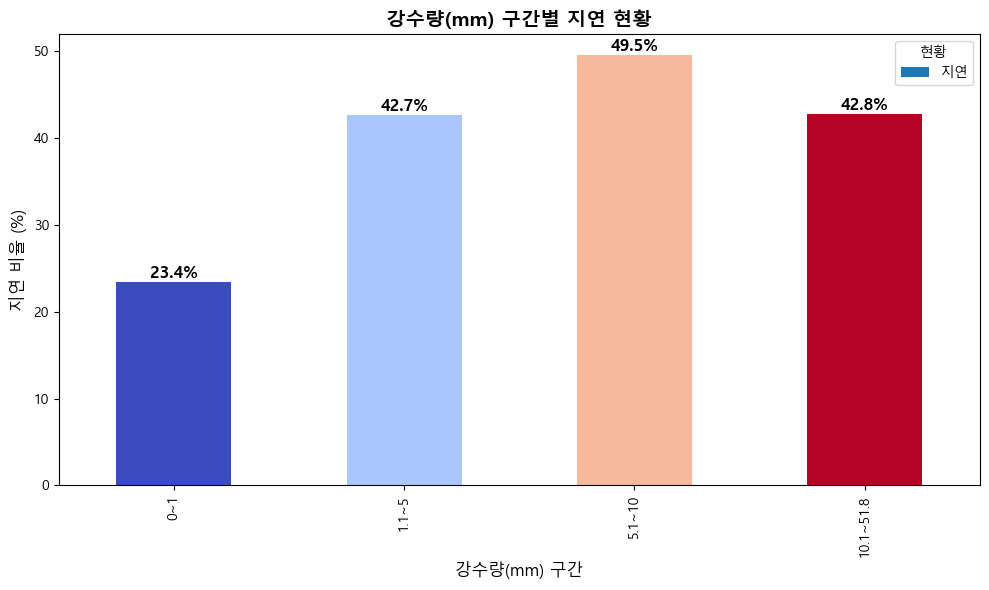

In [141]:
# Í∞Å ÎßâÎåÄ(Í∞ïÏàòÎüâ(mm) Íµ¨Í∞Ñ) ÏàòÏóê ÎßûÍ≤å coolwarm Ïª¨Îü¨ÎßµÏóêÏÑú ÏÉâÏÉÅ Ï∂îÏ∂ú
n = len(RAIN_percent.index)
colors = cm.coolwarm(np.linspace(0, 1, n))

# DataFrameÏùò plot()ÏúºÎ°ú Í∏∞Î≥∏ ÎßâÎåÄ Ï∞®Ìä∏ Í∑∏Î¶¨Í∏∞
ax = RAIN_percent.plot(kind='bar', stacked=True, figsize=(10, 6))

# Í∞Å ÎßâÎåÄÎ•º ÏàúÏÑúÎåÄÎ°ú ÏàúÌöåÌïòÎ©¥ÏÑú ÏÉâÏÉÅ Î≥ÄÍ≤Ω
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])
    height = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Ï∂ï Î†àÏù¥Î∏î Î∞è Ï†úÎ™© ÏÑ§Ï†ï
ax.set_xlabel('Í∞ïÏàòÎüâ(mm) Íµ¨Í∞Ñ', fontsize=12)
ax.set_ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)
ax.set_title('Í∞ïÏàòÎüâ(mm) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÌòÑÌô©', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [84]:
# Í∏∞Ïò®(¬∞C)

TEMP = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÎèÑÏ∞©','ÏßÄÏó∞'])] \
             .groupby('Í∏∞Ïò®(¬∞C)')['ÌòÑÌô©'] \
             .value_counts() \
             .unstack(fill_value=0)
TEMP


ÌòÑÌô©      ÎèÑÏ∞©  ÏßÄÏó∞
Í∏∞Ïò®(¬∞C)        
-13.6    1   0
-13.4    4   0
-12.2    1   0
-11.3   15   2
-11.1   10  13
...     ..  ..
 35.4    6   8
 35.5   11   4
 36.1    5   1
 36.2    3   7
 36.4   20   1

[460 rows x 2 columns]

In [85]:
# TEMP Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_TEMP = [(-13.6, -10), (-19.9, 0), (0.1, 10), (10.1, 20),(20.1,30),(30.1,36.4)]
LABELS_TEMP = ['-13.6~-10', '-19.9~0', '0.1~10' , '10.1~20','20.1~30','30.1~36.4'] 

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def TEMP_bin(x):
    for (low, high), label in zip(BINS_TEMP, LABELS_TEMP):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
TEMP_grouped = TEMP.groupby(TEMP.index.map(TEMP_bin)).sum()
TEMP_grouped = TEMP_grouped.reindex(LABELS_TEMP)
print(TEMP_grouped)

TEMP_percent = TEMP_grouped.div(TEMP_grouped.sum(axis=1), axis=0) * 100
TEMP_percent = TEMP_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
print(TEMP_percent)

ÌòÑÌô©            ÎèÑÏ∞©    ÏßÄÏó∞
Í∏∞Ïò®(¬∞C)                
-13.6~-10     63    45
-19.9~0     4033  1146
0.1~10     12814  3818
10.1~20    12018  3869
20.1~30    15785  5142
30.1~36.4   4117  1336
ÌòÑÌô©                ÏßÄÏó∞
Í∏∞Ïò®(¬∞C)              
-13.6~-10  41.666667
-19.9~0    22.127824
0.1~10     22.955748
10.1~20    24.353245
20.1~30    24.571128
30.1~36.4  24.500275


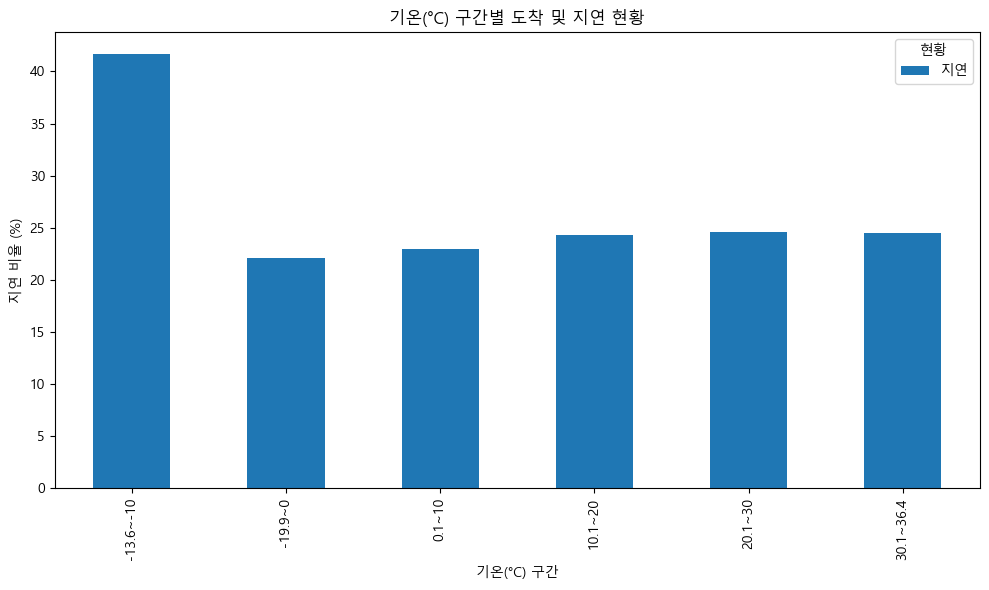

In [86]:
# TEMP Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
TEMP_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Í∏∞Ïò®(¬∞C) Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('Í∏∞Ïò®(¬∞C) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

In [87]:
# Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)	
DEW = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÎèÑÏ∞©','ÏßÄÏó∞'])] \
             .groupby('Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)')['ÌòÑÌô©'] \
             .value_counts() \
             .unstack(fill_value=0)
DEW


ÌòÑÌô©         ÎèÑÏ∞©  ÏßÄÏó∞
Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)        
-21.0       3   2
-20.9       1   0
-20.8       5   1
-20.5       6   0
-20.3       4   0
...        ..  ..
 28.0       6   3
 28.1      30  19
 28.2      10  12
 28.4      24  10
 28.7      16   2

[474 rows x 2 columns]

In [88]:
# DEW Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞

BINS_DEW = [(-21, -10), (-19.9, 0), (0.1, 10), (10.1, 20),(20.1,28.7)]
LABELS_DEW = ['-21~-10', '-19.9~0', '0.1~10' , '10.1~20','20.1~28.7'] 

# Ïù∏Îç±Ïä§ Í∞í(ÏãúÏ†ï)ÏùÑ Ìï¥Îãπ Íµ¨Í∞Ñ Î†àÏù¥Î∏îÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def DEW_bin(x):
    for (low, high), label in zip(BINS_DEW, LABELS_DEW):
        if low <= x <= high:
            return label
        
        
# Ïù∏Îç±Ïä§Ïóê Îß§Ìïë Ìï®Ïàò Ï†ÅÏö©ÌïòÏó¨ Í∑∏Î£πÌôî (mapÏùÑ ÌÜµÌï¥ Í∑∏Î£πÌÇ§ ÏÉùÏÑ±)
DEW_grouped = DEW.groupby(DEW.index.map(DEW_bin)).sum()
DEW_grouped = DEW_grouped.reindex(LABELS_DEW)
print(DEW_grouped)

DEW_percent = DEW_grouped.div(DEW_grouped.sum(axis=1), axis=0) * 100
DEW_percent = DEW_percent[['ÏßÄÏó∞']]

# Í≥ÑÏÇ∞Îêú ÎπÑÏú® ÌôïÏù∏
print(DEW_percent)

ÌòÑÌô©            ÎèÑÏ∞©    ÏßÄÏó∞
Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)             
-21~-10     2795   817
-19.9~0    11429  3271
0.1~10     11189  3470
10.1~20    12693  3824
20.1~28.7  10724  3974
ÌòÑÌô©                ÏßÄÏó∞
Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)           
-21~-10    22.619048
-19.9~0    22.251701
0.1~10     23.671465
10.1~20    23.151904
20.1~28.7  27.037692


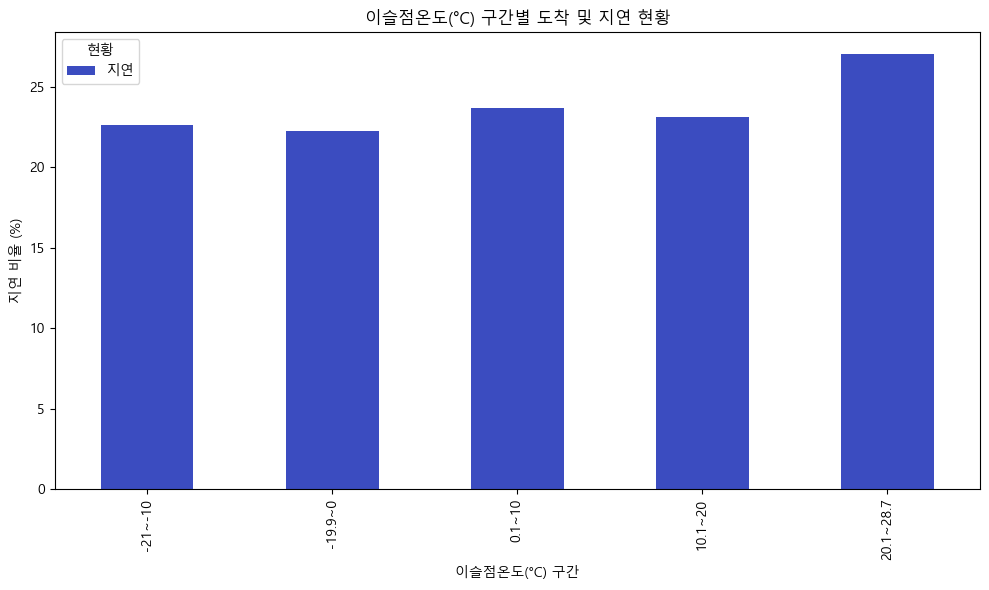

In [118]:

# DEW Íµ¨Í∞Ñ ÎπÑÏú® ÏãúÍ∞ÅÌôî
DEW_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')


plt.xlabel('Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) Íµ¨Í∞Ñ')
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)')
plt.title('Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

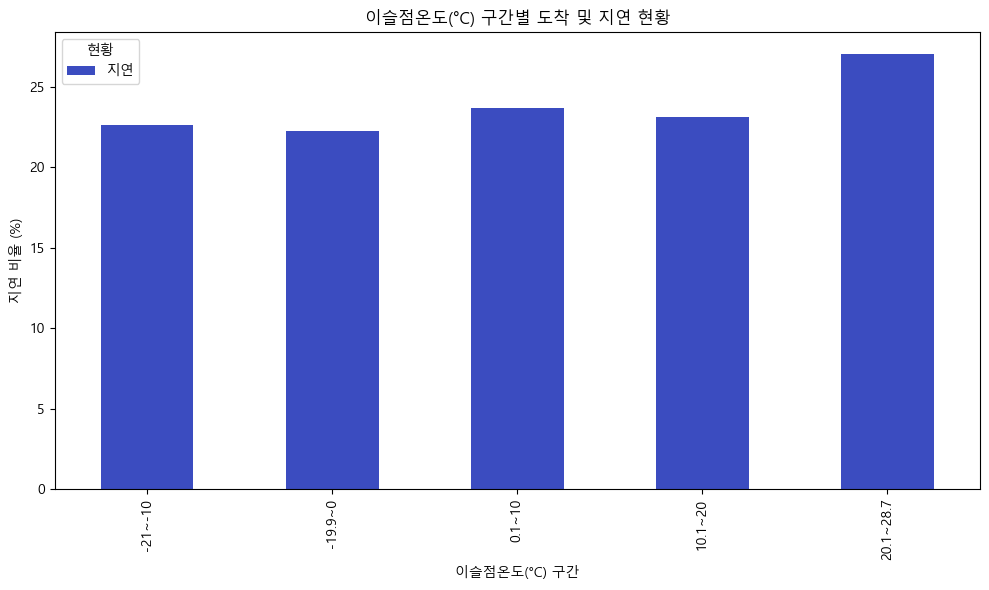

In [119]:
ax = DEW_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
ax.set(xlabel='Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) Íµ¨Í∞Ñ', ylabel='ÏßÄÏó∞ ÎπÑÏú® (%)',
       title='Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) Íµ¨Í∞ÑÎ≥Ñ ÎèÑÏ∞© Î∞è ÏßÄÏó∞ ÌòÑÌô©')
plt.tight_layout()
plt.show()

In [90]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [91]:
# Í∏∞Ïò®Í≥º Ïù¥Ïä¨Ï†êÏò®ÎèÑ ÎπÑÍµê

In [92]:
# 1. Í∏∞Ïò®Í≥º Ïù¥Ïä¨Ï†êÏò®ÎèÑÏùò Ï∞®Ïù¥ Í≥ÑÏÇ∞
# GIMPO DataFrameÏóê 'Í∏∞Ïò®(¬∞C)'ÏôÄ 'Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)' Ïó¥Ïù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# Ï∞®Ïù¥Í∞Ä ÏùåÏàòÍ∞Ä ÎÇòÏò¨ Ïàò ÏûàÏúºÎ©¥ Ï†àÎåÄÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò, ÏùåÏàòÎèÑ Ìè¨Ìï®Ìï†ÏßÄ Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# Ïó¨Í∏∞ÏÑúÎäî (Í∏∞Ïò® - Ïù¥Ïä¨Ï†êÏò®ÎèÑ)Í∞Ä ÏùåÏàòÍ∞Ä ÎÇòÏò§ÏßÄ ÏïäÎäî(ÎòêÎäî ÏñëÏàòÎùºÍ≥† Í∞ÄÏ†ï) ÏÉÅÌô©ÏúºÎ°ú ÏßÑÌñâÌï©ÎãàÎã§.
GIMPO['diff'] = GIMPO['Í∏∞Ïò®(¬∞C)'] - GIMPO['Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)']

# 2. Ï∞®Ïù¥ Íµ¨Í∞Ñ(bins)Í≥º Î†àÏù¥Î∏î(label) Ï†ïÏùò
# ÏòàÎ•º Îì§Ïñ¥, 0Î∂ÄÌÑ∞ 10ÍπåÏßÄ 1 Îã®ÏúÑ Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎààÎã§Í≥† Í∞ÄÏ†ï
bins = [-1,1, 2, 3, 4, 10,20,21,40]
labels = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]
# labels Í≤∞Í≥º: ["0~1", "1~2", "2~3", ..., "9~10"]

# 3. pd.cut()ÏùÑ Ïù¥Ïö©Ìï¥ Ï∞®Ïù¥Î•º Íµ¨Í∞ÑÎ≥ÑÎ°ú Î∂ÑÎ•ò (ÏÉàÎ°úÏö¥ Ïó¥ÏùÑ ÎßåÎì§ÏßÄ ÏïäÍ≥† Î∞îÎ°ú Îß§Ìïë)
diff_bins = pd.cut(GIMPO['diff'], bins=bins, labels=labels, include_lowest=True)

# 4. Í∞Å Íµ¨Í∞ÑÎ≥Ñ ÎπàÎèÑÏàò Í≥ÑÏÇ∞ Î∞è Î∞±Î∂ÑÏú® Î≥ÄÌôò
diff_counts = diff_bins.value_counts().sort_index()
diff_percent = diff_counts / diff_counts.sum() * 100

# Í≤∞Í≥º ÌôïÏù∏
print(diff_counts)
print(diff_percent)


diff
-1~1      7607
1~2       4834
2~3       4558
3~4       4377
4~10     26538
10~20    15620
20~21      130
21~40      524
Name: count, dtype: int64
diff
-1~1     11.851125
1~2       7.531003
2~3       7.101016
3~4       6.819032
4~10     41.344176
10~20    24.334767
20~21     0.202530
21~40     0.816352
Name: count, dtype: float64


ÌòÑÌô©        delay_rate
diff_bin            
-1~1       30.239285
1~2        27.865122
2~3        23.979816
3~5        23.026098
5~40       22.371218


C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\4223400534.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = subset.groupby('diff_bin')['ÌòÑÌô©'].value_counts().unstack(fill_value=0)


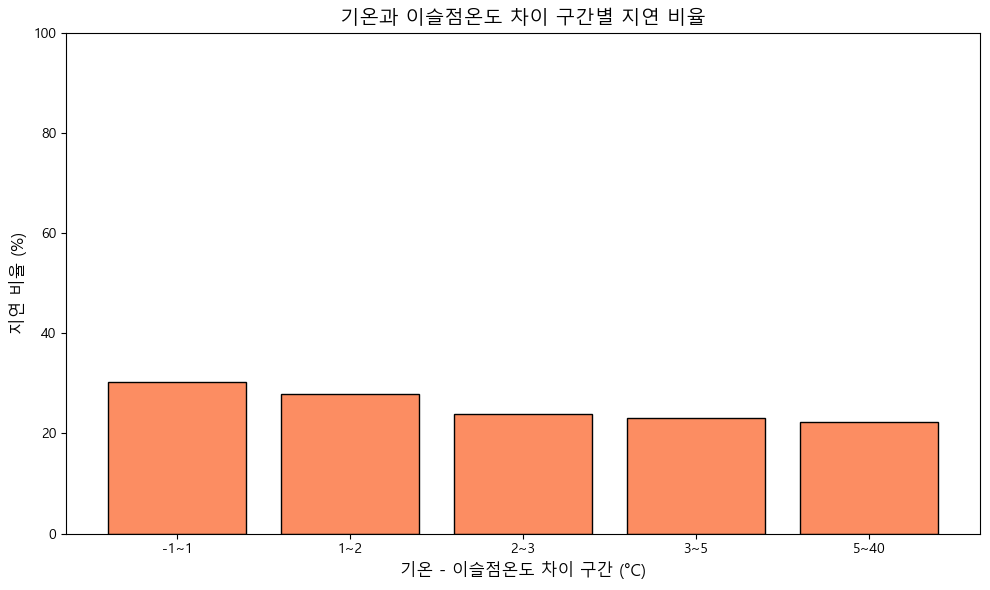

In [145]:
# 1. Í∏∞Ïò®Í≥º Ïù¥Ïä¨Ï†êÏò®ÎèÑÏùò Ï∞®Ïù¥ Í≥ÑÏÇ∞
# GIMPO DataFrameÏóê 'Í∏∞Ïò®(¬∞C)'ÏôÄ 'Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', Í∑∏Î¶¨Í≥† 'ÌòÑÌô©' Ïó¥Ïù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# 'ÌòÑÌô©'ÏóêÎäî "ÎèÑÏ∞©"Í≥º "ÏßÄÏó∞" (Í∏∞ÌÉÄ Ìï≠Î™©ÏùÄ Ï†úÏô∏) Í∞íÏù¥ ÏûàÏäµÎãàÎã§.
GIMPO['diff'] = GIMPO['Í∏∞Ïò®(¬∞C)'] - GIMPO['Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)']

# 2. "ÎèÑÏ∞©"Í≥º "ÏßÄÏó∞"ÎßåÏùÑ ÏÇ¨Ïö© (ÏõêÌïòÎäî Í≤ΩÏö∞)
subset = GIMPO[GIMPO['ÌòÑÌô©'].isin(['ÎèÑÏ∞©', 'ÏßÄÏó∞'])].copy()

# 3. Ï∞®Ïù¥ Íµ¨Í∞Ñ ÏÑ§Ï†ï
# ÏòàÎ•º Îì§Ïñ¥, 0Î∂ÄÌÑ∞ 10ÍπåÏßÄ 1 Îã®ÏúÑ Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàïÎãàÎã§.
# (ÏõêÌïòÎäî Íµ¨Í∞ÑÏù¥ "0~1, 1.1~2, ..."ÎùºÎ©¥ Í≤ΩÍ≥ÑÍ∞íÏùÑ Ï°∞Ï†ïÌïòÎ©¥ Îê©ÎãàÎã§.)
bins = [-1, 1, 2, 3, 5, 40]
labels = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]
# labels Í≤∞Í≥º: ['0~1', '1~2', '2~3', ‚Ä¶, '9~10']

# 4. pd.cut()ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ 'diff' Í∞íÏùÑ Íµ¨Í∞ÑÎ≥ÑÎ°ú Î∂ÑÎ•ò (ÏÉàÎ°úÏö¥ Ïó¥ 'diff_bin' ÏÉùÏÑ±)
subset['diff_bin'] = pd.cut(subset['diff'], bins=bins, labels=labels, include_lowest=True)

# 5. Í∞Å Íµ¨Í∞ÑÎ≥ÑÎ°ú "ÏßÄÏó∞"Í≥º "ÎèÑÏ∞©" Í±¥ÏàòÎ•º Í≥ÑÏÇ∞
#    Í∑∏Î£πÌôî ÌõÑ value_counts()Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤∞Í≥ºÎ•º ÌîºÎ≤óÌï©ÎãàÎã§.
grouped = subset.groupby('diff_bin')['ÌòÑÌô©'].value_counts().unstack(fill_value=0)

# 6. Í∞Å Íµ¨Í∞ÑÏùò Ï¥ù Í±¥ÏàòÏôÄ "ÏßÄÏó∞" Í±¥ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏßÄÏó∞ ÎπÑÏú® Í≥ÑÏÇ∞
grouped['total'] = grouped.sum(axis=1)
# grouped.get('ÏßÄÏó∞', 0)Îäî ÎßåÏïΩ 'ÏßÄÏó∞' Ïó¥Ïù¥ ÏóÜÏùÑ Í≤ΩÏö∞Î•º ÎåÄÎπÑÌïú ÏïàÏ†ÑÌïú Ï†ëÍ∑º Î∞©ÏãùÏûÖÎãàÎã§.
grouped['delay_rate'] = (grouped.get('ÏßÄÏó∞', 0) / grouped['total']) * 100

# 7. Í≥ÑÏÇ∞Îêú ÏßÄÏó∞ ÎπÑÏú® ÌôïÏù∏ (ÏõêÌïòÎäî Í≤ΩÏö∞)
print(grouped[['delay_rate']])

# 8. ÏßÄÏó∞ ÎπÑÏú® ÎßâÎåÄ Ï∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.bar(grouped.index.astype(str), grouped['delay_rate'], color='#fc8d62', edgecolor='black')
plt.xlabel('Í∏∞Ïò® - Ïù¥Ïä¨Ï†êÏò®ÎèÑ Ï∞®Ïù¥ Íµ¨Í∞Ñ (¬∞C)', fontsize=12)
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)
plt.title('Í∏∞Ïò®Í≥º Ïù¥Ïä¨Ï†êÏò®ÎèÑ Ï∞®Ïù¥ Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÎπÑÏú®', fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [94]:
# ÏòàÏãú: Ïù¥ÎØ∏ GIMPO Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ Î≥ëÌï©ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# GIMPOÏóêÎäî 'ÌòÑÌô©', 'Í∞ïÏàòÎüâ(mm)', 'ÏãúÏ†ï(m)', 'Ï†ÑÏö¥Îüâ(1/8)', 'ÌíçÏÜç(KT)' Îì±Ïùò Ïó¥Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå

# 1. "ÌòÑÌô©"ÏùÑ Ïù¥Ïö©Ìï¥ ÏßÄÏó∞ Ïó¨Î∂ÄÎ•º 0Í≥º 1Î°ú ÌëúÏãúÌïòÎäî ÏÉàÎ°úÏö¥ Ïó¥ ÏÉùÏÑ±
#    - 'ÏßÄÏó∞'Ïù¥Î©¥ 1, 'ÎèÑÏ∞©'Ïù¥Î©¥ 0 (Í∏∞ÌÉÄ Ìï≠Î™©ÏùÄ ÌïÑÏöîÏóê Îî∞Îùº Ï≤òÎ¶¨)
GIMPO['delay_flag'] = np.where(GIMPO['ÌòÑÌô©'] == 'ÏßÄÏó∞', 1, 0)

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï† Ïó¥ ÏÑ†ÌÉù
cols_of_interest = ['delay_flag', 'Í∞ïÏàòÎüâ(mm)', 'ÏãúÏ†ï(m)', 'Ï†ÑÏö¥Îüâ(1/8)', 'ÌíçÏÜç(KT)']

# 3. ÏÑ†ÌÉùÌïú Ïó¥Ïóê ÎåÄÌï¥ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = GIMPO[cols_of_interest].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨:")
print(corr_matrix)

# 4. "ÏßÄÏó∞ Ïó¨Î∂Ä" (delay_flag)ÏôÄ Îã§Î•∏ Í∏∞ÏÉÅ Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎßå Ï∂îÏ∂úÌïòÏó¨ Ï∂úÎ†•
delay_corr = corr_matrix['delay_flag'].drop('delay_flag')  # delay_flagÏôÄ ÏûêÍ∏∞ ÏûêÏã† Ï†úÏô∏
print("\nÏßÄÏó∞ Ïó¨Î∂ÄÏôÄ Í∞Å Í∏∞ÏÉÅ Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(delay_corr)

ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨:
            delay_flag   Í∞ïÏàòÎüâ(mm)     ÏãúÏ†ï(m)  Ï†ÑÏö¥Îüâ(1/8)    ÌíçÏÜç(KT)
delay_flag    1.000000  0.046655 -0.023781  0.105229  0.070711
Í∞ïÏàòÎüâ(mm)       0.046655  1.000000 -0.238512  0.147562  0.047955
ÏãúÏ†ï(m)        -0.023781 -0.238512  1.000000 -0.188882  0.097178
Ï†ÑÏö¥Îüâ(1/8)      0.105229  0.147562 -0.188882  1.000000  0.098695
ÌíçÏÜç(KT)        0.070711  0.047955  0.097178  0.098695  1.000000

ÏßÄÏó∞ Ïó¨Î∂ÄÏôÄ Í∞Å Í∏∞ÏÉÅ Î≥ÄÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:
Í∞ïÏàòÎüâ(mm)     0.046655
ÏãúÏ†ï(m)      -0.023781
Ï†ÑÏö¥Îüâ(1/8)    0.105229
ÌíçÏÜç(KT)      0.070711
Name: delay_flag, dtype: float64


In [95]:
# Íµ¨Í∞ÑÏùò Ï§ëÍ∞ÑÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò
def compute_bin_midpoints(bins):
    """
    bins: [(low1, high1), (low2, high2), ...]
    Î∞òÌôò: [mid1, mid2, ...] (Í∞Å Íµ¨Í∞ÑÏùò Ï§ëÍ∞ÑÍ∞í)
    """
    return [ (low + high) / 2 for (low, high) in bins ]

# ÎßåÏïΩ Í∞Å DataFrameÏóêÏÑú 'ÏßÄÏó∞' Ïó¥Ïù¥ KeyErrorÍ∞Ä Î∞úÏÉùÌïòÎ©¥ Ï≤´ Î≤àÏß∏ Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÎäî Ìï®Ïàò
def get_delay_values(df, col_name='ÏßÄÏó∞'):
    if col_name in df.columns:
        return df[col_name].values
    else:
        # KeyError Î∞úÏÉù Ïãú, Ï≤´ Î≤àÏß∏ Ïó¥Ïùò Í∞íÏùÑ ÏÇ¨Ïö©
        return df.iloc[:, 0].values

# =====================================================
# 1. Í∞ïÏàòÎüâ(mm)
# =====================================================
# Í∞ïÏàòÎüâ Íµ¨Í∞Ñ Ï†ïÏùò (ÏòàÏãú)
BINS_RAIN = [(0, 1), (1.1, 5), (5.1, 10), (10.1, 51.8)]
LABELS_RAIN = ['0~1', '1.1~5', '5.1~10', '10.1~51.8']
# Í∞Å Íµ¨Í∞ÑÏùò Ï§ëÍ∞ÑÍ∞í Í≥ÑÏÇ∞
mid_rain = compute_bin_midpoints(BINS_RAIN)
# RAIN_percent DataFrameÏóêÏÑú ÏßÄÏó∞Î•† Í∞íÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
delay_rate_rain = get_delay_values(RAIN_percent, 'ÏßÄÏó∞')
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_rain = np.corrcoef(mid_rain, delay_rate_rain)[0, 1]
print("Í∞ïÏàòÎüâ(mm) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", corr_rain)

# =====================================================
# 2. ÏãúÏ†ï(m)
# =====================================================
BINS_SIGHT = [(200, 1000), (1200, 2000), (2200, 5000), (6000, 10000)]
LABELS_SIGHT = ['200~1000', '1200~2000', '2200~5000', '6000~10000']
mid_sight = compute_bin_midpoints(BINS_SIGHT)
delay_rate_sight = get_delay_values(SIGHT_percent, 'ÏßÄÏó∞')
corr_sight = np.corrcoef(mid_sight, delay_rate_sight)[0, 1]
print("ÏãúÏ†ï(m) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", corr_sight)

# =====================================================
# 3. Ï†ÑÏö¥Îüâ(1/8)
# =====================================================
BINS_CLOUD = [(0, 2), (3, 4), (5, 6), (7, 8)]
LABELS_CLOUD = ['0~2', '3~4', '5~6', '7~8']
mid_cloud = compute_bin_midpoints(BINS_CLOUD)
delay_rate_cloud = get_delay_values(CLOUD_percent, 'ÏßÄÏó∞')
corr_cloud = np.corrcoef(mid_cloud, delay_rate_cloud)[0, 1]
print("Ï†ÑÏö¥Îüâ(1/8) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", corr_cloud)

# =====================================================
# 4. ÌíçÏÜç(KT)
# =====================================================
BINS_WIND = [(0, 5), (6, 10), (11, 15), (16, 20)]
LABELS_WIND = ['0~5', '6~10', '11~15', '16~20']
mid_wind = compute_bin_midpoints(BINS_WIND)
delay_rate_wind = get_delay_values(WIND_percent, 'ÏßÄÏó∞')
corr_wind = np.corrcoef(mid_wind, delay_rate_wind)[0, 1]
print("ÌíçÏÜç(KT) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò:", corr_wind)


Í∞ïÏàòÎüâ(mm) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.3703229390751099
ÏãúÏ†ï(m) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.8891818197244725
Ï†ÑÏö¥Îüâ(1/8) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.9461215745638661
ÌíçÏÜç(KT) Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞Î•†Í≥º Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.8610602720414717


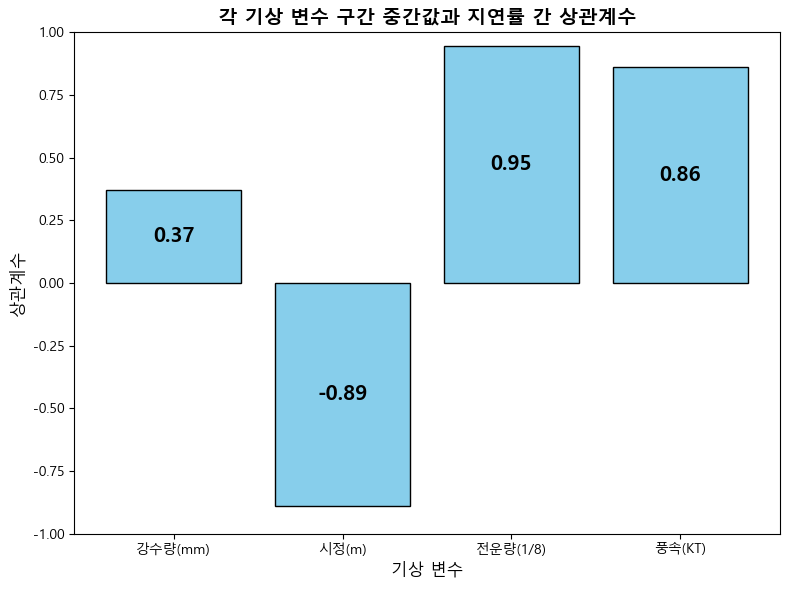

In [96]:
# Î∞©Î≤ï 1: ÏùåÏàò Í∏∞Ìò∏ ÎåÄÏã† ÌïòÏù¥Ìîà ÏÇ¨Ïö©
plt.rcParams['axes.unicode_minus'] = False


# Ïù¥ÎØ∏ Í∞Å Î≥ÄÏàòÎ≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìïú Î≥ÄÏàòÎì§
# ÏòàÏãú Î≥ÄÏàò Ïù¥Î¶Ñ: corr_rain, corr_sight, corr_cloud, corr_wind
# (Í≥ÑÏÇ∞Ìïú ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞íÏù¥ ÏùåÏàòÏùº ÏàòÎèÑ ÏûàÏúºÎØÄÎ°ú, yÏ∂ï Î≤îÏúÑÎäî [-1, 1]Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.)

# Î≥ÄÏàò Ïù¥Î¶ÑÍ≥º ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
variables = ['Í∞ïÏàòÎüâ(mm)', 'ÏãúÏ†ï(m)', 'Ï†ÑÏö¥Îüâ(1/8)', 'ÌíçÏÜç(KT)']
corr_values = [corr_rain, corr_sight, corr_cloud, corr_wind]

# Figure ÏÉùÏÑ±
plt.figure(figsize=(8, 6))
bars = plt.bar(variables, corr_values, color='skyblue', edgecolor='black')

# Ï∂ï Î†àÏù¥Î∏îÍ≥º Ï†úÎ™© ÏÑ§Ï†ï
plt.xlabel('Í∏∞ÏÉÅ Î≥ÄÏàò', fontsize=12)
plt.ylabel('ÏÉÅÍ¥ÄÍ≥ÑÏàò', fontsize=12)
plt.title('Í∞Å Í∏∞ÏÉÅ Î≥ÄÏàò Íµ¨Í∞Ñ Ï§ëÍ∞ÑÍ∞íÍ≥º ÏßÄÏó∞Î•† Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò', fontsize=14, fontweight='bold')
plt.ylim(-1, 1)  # ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Î≤îÏúÑÎäî -1 ~ 1

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞í ÌëúÏãú (ÏÜåÏàòÏ†ê ÎëòÏß∏ÏûêÎ¶¨ÍπåÏßÄ)
for bar, corr in zip(bars, corr_values):
    height = bar.get_height()  # ÎßâÎåÄÏùò ÎÜíÏù¥
    plt.text(bar.get_x() + bar.get_width()/2,  # ÎßâÎåÄÏùò Ï§ëÏïô (xÏ¢åÌëú)
             height / 2,  # ÎßâÎåÄ ÎÜíÏù¥Ïùò Ï†àÎ∞ò (yÏ¢åÌëú)
             f'{corr:.2f}',  # ÌëúÏãúÌï† Í∞í
             ha='center', va='center',  # Ï§ëÏïô Ï†ïÎ†¨
             fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\2063500063.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Í∏∞ÏÉÅ Î≥ÄÏàò', y='ÏßÄÏó∞ ÎπÑÏú®', data=boxplot_df, palette='coolwarm')


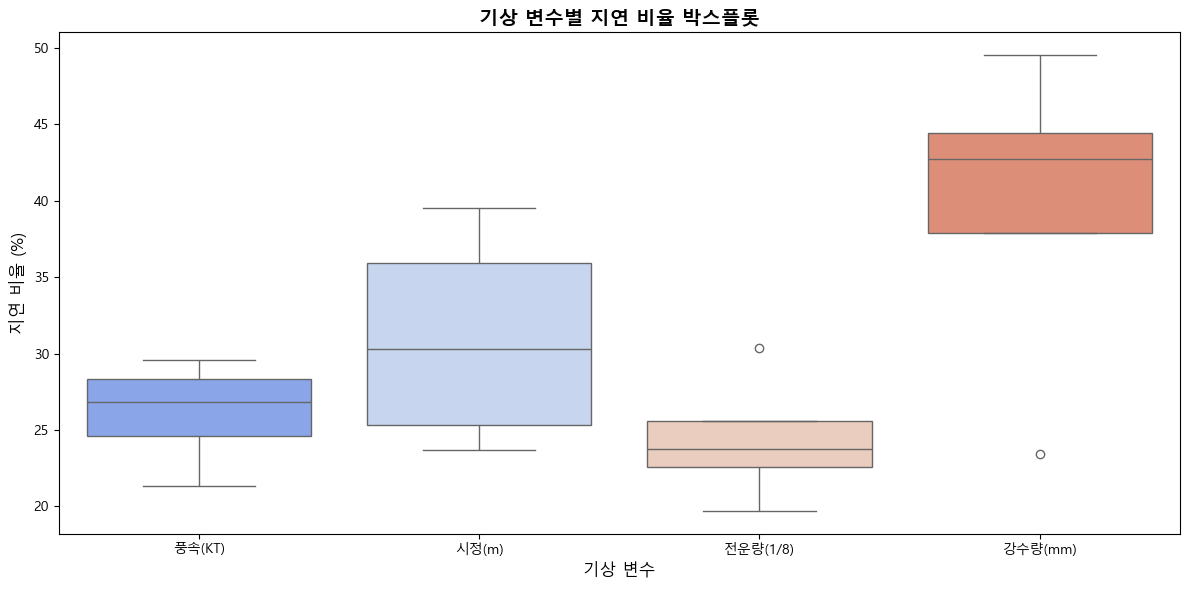

In [99]:
# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ: Í∞Å Î≥ÄÏàòÎ≥Ñ Íµ¨Í∞ÑÍ≥º ÏßÄÏó∞ ÎπÑÏú®ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
boxplot_data = []

# ÌíçÏÜç(KT)
for category, value in WIND_percent['ÏßÄÏó∞'].items():
    boxplot_data.append(['ÌíçÏÜç(KT)', category, value])

# ÏãúÏ†ï(m)
for category, value in SIGHT_percent['ÏßÄÏó∞'].items():
    boxplot_data.append(['ÏãúÏ†ï(m)', category, value])

# Ï†ÑÏö¥Îüâ(1/8)
for category, value in CLOUD_percent['ÏßÄÏó∞'].items():
    boxplot_data.append(['Ï†ÑÏö¥Îüâ(1/8)', category, value])

# Í∞ïÏàòÎüâ(mm)
for category, value in RAIN_percent['ÏßÄÏó∞'].items():
    boxplot_data.append(['Í∞ïÏàòÎüâ(mm)', category, value])

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò
boxplot_df = pd.DataFrame(boxplot_data, columns=['Í∏∞ÏÉÅ Î≥ÄÏàò', 'Íµ¨Í∞Ñ', 'ÏßÄÏó∞ ÎπÑÏú®'])

# üìå Î∞ïÏä§ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 6))
sns.boxplot(x='Í∏∞ÏÉÅ Î≥ÄÏàò', y='ÏßÄÏó∞ ÎπÑÏú®', data=boxplot_df, palette='coolwarm')

# Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
plt.title('Í∏∞ÏÉÅ Î≥ÄÏàòÎ≥Ñ ÏßÄÏó∞ ÎπÑÏú® Î∞ïÏä§ÌîåÎ°Ø', fontsize=14, fontweight='bold')
plt.xlabel('Í∏∞ÏÉÅ Î≥ÄÏàò', fontsize=12)
plt.ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Íµ¨Í∞Ñ', y='ÏßÄÏó∞ ÎπÑÏú®', data=boxplot_df, ax=axes[idx], palette='coolwarm')
C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Íµ¨Í∞Ñ', y='ÏßÄÏó∞ ÎπÑÏú®', data=boxplot_df, ax=axes[idx], palette='coolwarm')
C:\Users\KDP-27\AppData\Local\Temp\ipykernel_43892\1900489447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Íµ¨Í∞Ñ', y='ÏßÄÏó∞ ÎπÑÏú®', data=bo

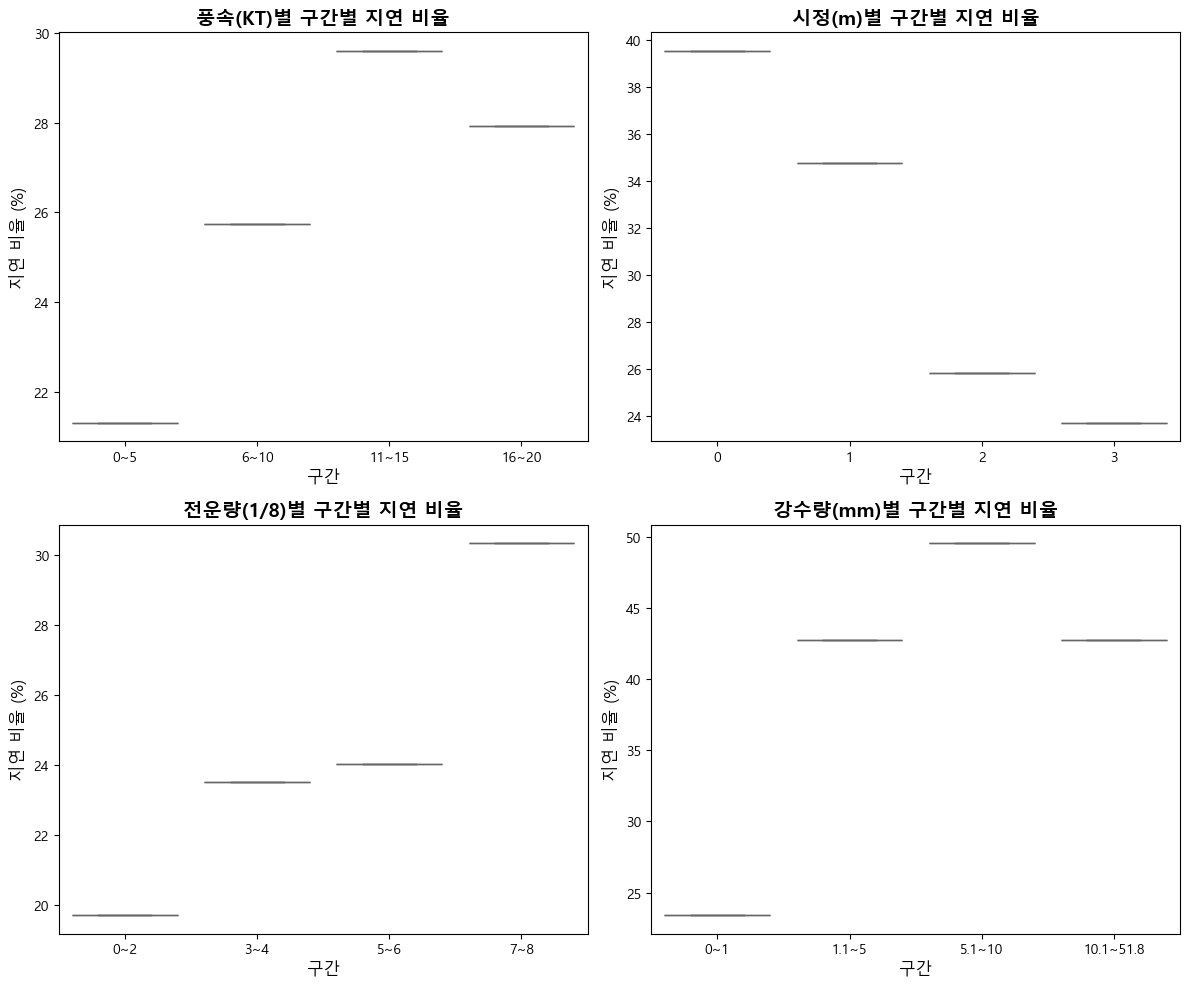

In [102]:
# üìå Î∞ïÏä§ÌîåÎ°ØÏùÑ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Í∑∏Î¶¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Ìï®Ïàò
def prepare_boxplot_data(percent_df, variable_name):
    boxplot_data = []
    for category, value in percent_df['ÏßÄÏó∞'].items():
        boxplot_data.append([variable_name, category, value])
    return pd.DataFrame(boxplot_data, columns=['Í∏∞ÏÉÅ Î≥ÄÏàò', 'Íµ¨Í∞Ñ', 'ÏßÄÏó∞ ÎπÑÏú®'])

# Í∞Å Í∏∞ÏÉÅ Î≥ÄÏàòÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø Í∞úÎ≥Ñ ÏÉùÏÑ±
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
axes = axes.flatten()  # 2Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ 1Ï∞®Ïõê Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò

# Í∏∞ÏÉÅ Î≥ÄÏàò Î™©Î°ù Î∞è Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Îß§Ìïë
weather_factors = {
    "ÌíçÏÜç(KT)": WIND_percent,
    "ÏãúÏ†ï(m)": SIGHT_percent,  # ‚úÖ ÏàòÏ†ïÎêú ÏãúÏ†ï Íµ¨Í∞Ñ Ï†ÅÏö©
    "Ï†ÑÏö¥Îüâ(1/8)": CLOUD_percent,
    "Í∞ïÏàòÎüâ(mm)": RAIN_percent
}

# Í∞úÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø ÏÉùÏÑ±
for idx, (factor, df) in enumerate(weather_factors.items()):
    boxplot_df = prepare_boxplot_data(df, factor)
    sns.boxplot(x='Íµ¨Í∞Ñ', y='ÏßÄÏó∞ ÎπÑÏú®', data=boxplot_df, ax=axes[idx], palette='coolwarm')
    
    # Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
    axes[idx].set_title(f'{factor}Î≥Ñ Íµ¨Í∞ÑÎ≥Ñ ÏßÄÏó∞ ÎπÑÏú®', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Íµ¨Í∞Ñ', fontsize=12)
    axes[idx].set_ylabel('ÏßÄÏó∞ ÎπÑÏú® (%)', fontsize=12)

plt.tight_layout()
plt.show()